In [1]:
from itertools import product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from superfv.euler_solver import EulerSolver
import superfv.initial_conditions as ic

*a priori* solution. The $P$ profile has strange artifacts and adaptive time-stepping doesn't work.

In [20]:
N = 64
p = 3

apriori_solver = EulerSolver(
    ic=lambda array_slicer, x, y, z: ic.square(
        array_slicer, x, y, z, vx=1, bounds=(1, 2)
    ),
    nx=N,
    p=p,
    ZS=True,
    limiting_vars=("rho",),
    PAD={"rho": (1, 2)},
    adaptive_timestepping=False,
    nodes_from_primitive_fv_averages=True,
    riemann_solver="hllc",
)
apriori_solver.run(1.0)

100%|██████████| 1.0/1.0 [00:02]


Text(0, 0.5, '$P$')

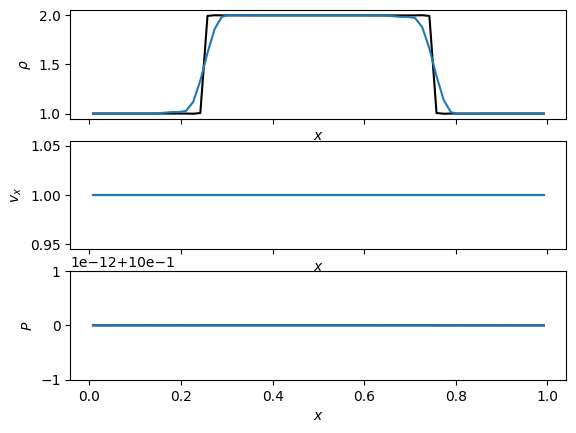

In [21]:
fig, axs = plt.subplots(3, 1, sharex=True)
apriori_solver.plot_1d_slice(axs[0], "rho", array="w", x=None, t=0, color="k")
apriori_solver.plot_1d_slice(axs[0], "rho", array="w", x=None, t=1)
axs[0].set_ylabel(r"$\rho$")
apriori_solver.plot_1d_slice(axs[1], "vx", array="w", x=None, t=0, color="k")
apriori_solver.plot_1d_slice(axs[1], "vx", array="w", x=None, t=1)
axs[1].set_ylabel(r"$v_x$")
apriori_solver.plot_1d_slice(axs[2], "P", array="w", x=None, t=0, color="k")
apriori_solver.plot_1d_slice(axs[2], "P", array="w", x=None, t=1)
axs[2].set_ylabel(r"$P$")

*a posteriori* solution. $P$ is perfectly 0.

In [22]:
N = 64
p = 3

aposteriori_solver = EulerSolver(
    ic=lambda array_slicer, x, y, z: ic.square(
        array_slicer, x, y, z, vx=1, bounds=(1, 2)
    ),
    nx=N,
    p=p,
    MOOD=True,
    NAD=1e-5,
    limiting_vars=("rho",),
    PAD={"rho": (1, 2)},
    nodes_from_primitive_fv_averages=True,
    riemann_solver="hllc",
)
aposteriori_solver.run(1.0)

100%|██████████| 1.0/1.0 [00:03]


Text(0, 0.5, '$P$')

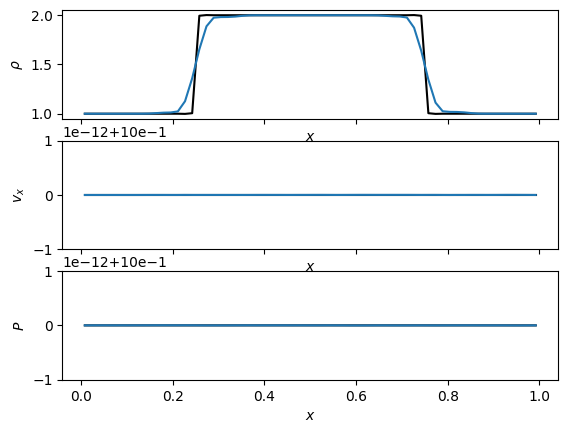

In [23]:
fig, axs = plt.subplots(3, 1, sharex=True)
aposteriori_solver.plot_1d_slice(axs[0], "rho", array="w", x=None, t=0, color="k")
aposteriori_solver.plot_1d_slice(axs[0], "rho", array="w", x=None, t=1)
axs[0].set_ylabel(r"$\rho$")
aposteriori_solver.plot_1d_slice(axs[1], "vx", array="w", x=None, t=0, color="k")
aposteriori_solver.plot_1d_slice(axs[1], "vx", array="w", x=None, t=1)
axs[1].set_ylabel(r"$v_x$")
aposteriori_solver.plot_1d_slice(axs[2], "P", array="w", x=None, t=0, color="k")
aposteriori_solver.plot_1d_slice(axs[2], "P", array="w", x=None, t=1)
axs[2].set_ylabel(r"$P$")

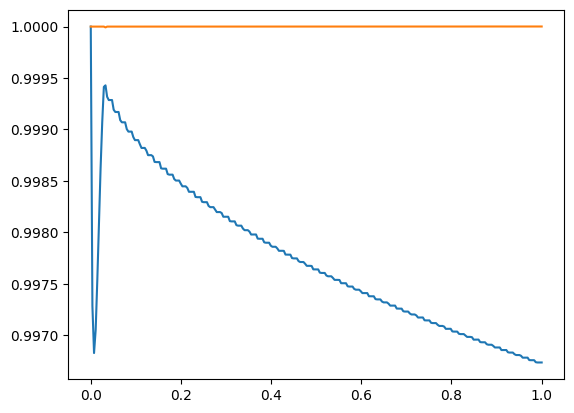

In [24]:
fig, ax = plt.subplots()
ax.plot(apriori_solver.minisnapshots["t"], apriori_solver.minisnapshots["min_rho"])
ax.plot(
    aposteriori_solver.minisnapshots["t"], aposteriori_solver.minisnapshots["min_rho"]
)

In [12]:
limting_kwargs = {
    "none": {},
    "a priori": dict(
        ZS=True,
        limiting_vars="all",
        PAD={"rho": (1, 2)},
        adaptive_timestepping=False,
        SED=True,
    ),
    "a posteriori": dict(
        MOOD=True, NAD=1e-5, limiting_vars="all", PAD={"rho": (1, 2)}, SED=True
    ),
}
rows = []
for (f, name), (p, limiting), N in product(
    [(ic.square, "square"), (ic.sinus, "sinus")],
    [(0, "none"), (3, "a priori"), (3, "a posteriori")],
    [32, 64, 128],
):
    solver = EulerSolver(
        ic=lambda array_slicer, x, y, z: f(array_slicer, x, y, z, vx=1, bounds=(1, 2)),
        nx=N,
        p=p,
        nodes_from_primitive_fv_averages=True,
        riemann_solver="llf",
        **limting_kwargs[limiting],
    )
    solver.run(1.0)
    l1_error = np.mean(np.abs(solver.snapshots[-1]["u"] - solver.snapshots[0]["u"]))
    l2_error = np.sqrt(
        np.mean(np.square(solver.snapshots[-1]["u"] - solver.snapshots[0]["u"]))
    )
    linf_error = np.max(np.abs(solver.snapshots[-1]["u"] - solver.snapshots[0]["u"]))
    rows.append(
        {
            "ic": name,
            "N": N,
            "p": p,
            "limiting": limiting,
            "l1": l1_error,
            "l2": l2_error,
            "linf": linf_error,
        }
    )
df = pd.DataFrame(rows)
df = df.sort_values(by=["p"], ignore_index=True)

100%|██████████| 1.0/1.0 [00:00]                 
100%|██████████| 1.0/1.0 [00:00]                 
100%|██████████| 1.0/1.0 [00:01]                  
100%|██████████| 1.0/1.0 [00:01]                 
100%|██████████| 1.0/1.0 [00:01]                  
100%|██████████| 1.0/1.0 [00:04]                  
100%|██████████| 1.0/1.0 [00:01]                 
100%|██████████| 1.0/1.0 [00:02]                 
100%|██████████| 1.0/1.0 [00:06]                  
100%|██████████| 1.0/1.0 [00:00]                 
100%|██████████| 1.0/1.0 [00:00]                 
100%|██████████| 1.0/1.0 [00:01]                  
100%|██████████| 1.0/1.0 [00:00]                 
100%|██████████| 1.0/1.0 [00:01]                 
100%|██████████| 1.0/1.0 [00:04]                  
100%|██████████| 1.0/1.0 [00:00]                 
100%|██████████| 1.0/1.0 [00:01]                 
100%|██████████| 1.0/1.0 [00:04]                  


Text(0, 0.5, 'L1 error')

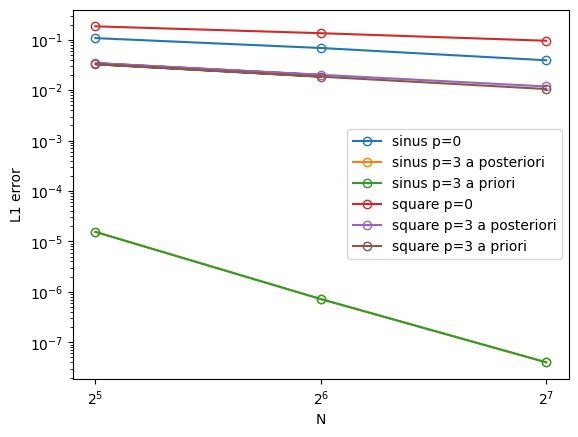

In [13]:
# plot error
fig, ax = plt.subplots()
for ic_name, df_ic in df.groupby("ic"):
    for (p, limiting), df_p in df_ic.groupby(["p", "limiting"]):
        ax.plot(
            df_p["N"],
            df_p["l1"],
            label=f"{ic_name} p={p}" + (f" {limiting}" if limiting != "none" else ""),
            marker="o",
            mfc="none",
        )
ax.legend()
ax.set_xscale("log", base=2)
ax.set_yscale("log")
ax.set_xlabel("N")
ax.set_ylabel("L1 error")